In [23]:
import pandas as pd 
import numpy as np
import pandas_datareader as wb
import datetime as dt
import yfinance as yf
import math 

# Upload weekly prices, set index=date, drop nans

In [3]:
spy_df=yf.download('SPY', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.547979,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.729692,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.784204,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.056757,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.165798,531500


In [ ]:
yf.download('SPY')

In [5]:
def download_ticker(ticker='SPY', returned_cols=['Adj Close'], interval='1d'):
    """params: 
    ticker: default is SPY
    returned_cols: (list) default is Adj Close
    interval: one of 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo, default is 1d
    returns: df with ticker data index is timeseries"""
    return yf.download(ticker, interval=interval)[returned_cols]

In [7]:
spy=download_ticker()

[*********************100%***********************]  1 of 1 completed


In [12]:
sum(spy.isna().sum())

0

In [13]:
def check_nulls(df):
    """params: 
    df: df for which we want to check nulls
    returns: sum of Nans"""
    return sum(df.isna().sum())

In [14]:
check_nulls(spy)

0

In [38]:
math.floor(spy.shape[0]*.8)

5916

In [35]:
spy.iloc[5916:]

,Adj Close
Date,
2016-07-27,195.408310
2016-07-28,195.633942
2016-07-29,195.949814
2016-08-01,195.787399
2016-08-02,194.532867
...,...
2022-06-03,410.540009
2022-06-06,411.790009
2022-06-07,415.739990


In [ ]:
np.floor(len())

In [83]:
spy_test.rename(columns={'Adj Close':'Prediction'})

,Prediction
Date,
2016-07-27,195.408310
2016-07-28,195.633942
2016-07-29,195.949814
2016-08-01,195.787399
2016-08-02,194.532867
...,...
2022-06-03,410.540009
2022-06-06,411.790009
2022-06-07,415.739990


In [90]:
def timesplit_train_test(df,train_size=.8):
    """Splits dataframe into train and test according to train_size"""
    ind_split=math.floor(len(df)*train_size)
    train=df.iloc[:ind_split]
    test=df.iloc[ind_split:]
    return train,test

In [91]:
spy_train,spy_test=timesplit_train_test(spy)

In [120]:
def t_is_t_m1_preds(df):
    """Returns predictions for price on all test set such as t=t-1
    params:df
    return: df: -date: pred_price for date 
                     : Boolean invest recommandation
                     : actual price at the end of the day"""
    df1=df.copy()
    df1['prediction']=df1['Adj Close'].shift(1)
    df1['recommandation']=0
    return df1

In [156]:
basic_pred=t_is_t_m1_preds(spy_test)

In [157]:
basic_pred['portfolio_value']=None

In [158]:
basic_pred.iloc[0,-1]=100000

In [159]:
basic_pred

,Adj Close,prediction,recommandation,portfolio_value
Date,,,,
2016-07-27,195.408310,NaN,0,100000
2016-07-28,195.633942,195.408310,0,None
2016-07-29,195.949814,195.633942,0,None
2016-08-01,195.787399,195.949814,0,None
2016-08-02,194.532867,195.787399,0,None
...,...,...,...,...
2022-06-03,410.540009,417.390015,0,None
2022-06-06,411.790009,410.540009,0,None
2022-06-07,415.739990,411.790009,0,None


In [161]:
a=basic_pred['portfolio_value']

In [140]:
a+=basic_pred['portfolio_value'].shift(1)+(basic_pred['Adj Close']/basic_pred['Adj Close'].shift(1))*basic_pred['recommandation']*basic_pred['portfolio_value'].shift(1)

Date
2016-07-27         NaN
2016-07-28    200000.0
2016-07-29    200000.0
2016-08-01    200000.0
2016-08-02    200000.0
                ...   
2022-06-03    200000.0
2022-06-06    200000.0
2022-06-07    200000.0
2022-06-08    200000.0
2022-06-09    200000.0
Name: portfolio_value, Length: 1479, dtype: float64

In [155]:
basic_pred

,Adj Close,prediction,recommandation,portfolio_value
Date,,,,
2016-07-27,195.408310,NaN,0,100000
2016-07-28,195.633942,195.408310,0,None
2016-07-29,195.949814,195.633942,0,None
2016-08-01,195.787399,195.949814,0,None
2016-08-02,194.532867,195.787399,0,None
...,...,...,...,...
2022-06-03,410.540009,417.390015,0,None
2022-06-06,411.790009,410.540009,0,None
2022-06-07,415.739990,411.790009,0,None


In [108]:
whos

Variable               Type         Data/Info
---------------------------------------------
a                      DataFrame                Adj Close\nDa<...>\n[1479 rows x 1 columns]
basic_pred             DataFrame                 Adj Close  p<...>\n[1479 rows x 3 columns]
check_nulls            function     <function check_nulls at 0x00000289AD6C6550>
download_ticker        function     <function download_ticker at 0x00000289AD7A65E0>
dt                     module       <module 'datetime' from '<...>onda3\\lib\\datetime.py'>
json                   module       <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
math                   module       <module 'math' (built-in)>
np                     module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                     module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
split_train_test       function     <function split_train_test at 0x00000289AE08F5E0>
spy                    DataFrame         

In [2]:
week_prices=pd.read_csv('weekly_sectors_prices.csv')
week_volumes=pd.read_csv('weekly_sectors_volume.csv')

In [3]:
week_prices['Date'] = pd.to_datetime(week_prices.Date)
week_prices.set_index('Date',inplace=True)

In [4]:
week_prices.dropna(inplace=True)

In [5]:
week_prices

,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-10-05,24.132202,38.924061,52.529449,16.685202,47.334866,38.055096,41.815647,24.272911,35.593048,61.584793,71.919304
2015-10-12,24.568020,38.871159,52.750397,16.907768,46.598850,38.504635,41.959377,24.660831,36.397732,62.772556,72.446770
2015-10-19,25.576374,39.691071,52.011292,17.331364,48.469906,40.211067,42.897816,25.005285,36.243305,62.385639,73.686745
2015-10-26,25.525103,39.920296,51.836056,17.288280,48.124073,40.045929,42.170734,24.908707,35.560539,64.194305,74.926750
2015-11-02,25.636196,39.964378,53.184727,17.754953,48.647259,40.678944,41.578922,24.103901,34.341324,64.563240,75.343170
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,32.219090,87.218002,53.674999,38.406002,102.055000,167.563004,74.687996,49.625000,69.463997,137.391998,194.997986
2021-12-20,32.830002,87.864723,54.198227,38.634903,103.529434,172.613449,74.737656,49.496101,69.176262,138.766724,202.886185
2021-12-27,32.910000,90.610001,55.500000,39.049999,105.809998,173.869995,77.110001,51.810001,71.580002,140.889999,204.440002


In [6]:
week_changes=week_prices.pct_change()*100

In [7]:
week_changes

,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-12,1.805959,-0.135911,0.420616,1.333916,-1.554912,1.181285,0.343723,1.598162,2.260789,1.928663,0.733413
2015-10-19,4.104336,2.109307,-1.401137,2.505330,4.015240,4.431758,2.236540,1.396765,-0.424275,-0.616379,1.711567
2015-10-26,-0.200464,0.577523,-0.336919,-0.248585,-0.713500,-0.410679,-1.694915,-0.386233,-1.883840,2.899171,1.682807
2015-11-02,0.435232,0.110427,2.601801,2.699360,1.087160,1.580722,-1.403372,-3.231022,-3.428563,0.574716,0.555769
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,2.149866,-0.724801,-5.013976,-1.177974,-2.762221,-4.002747,1.361365,1.748327,1.243664,2.481792,-4.731948
2021-12-20,1.896119,0.741499,0.974807,0.596003,1.444744,3.014058,0.066490,-0.259745,-0.414222,1.000586,4.045272
2021-12-27,0.243674,3.124436,2.401874,1.074407,2.202816,0.727954,3.174230,4.674914,3.474805,1.530104,0.765857


In [8]:
week_changes['best_sector']=week_changes.idxmax(axis=1)
week_changes['worst_sector']=week_changes[week_changes.columns.difference(['best_sector'])].idxmin(axis=1)

In [9]:
week_changes.head()

,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,best_sector,worst_sector
Date,,,,,,,,,,,,,
2015-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-12,1.805959,-0.135911,0.420616,1.333916,-1.554912,1.181285,0.343723,1.598162,2.260789,1.928663,0.733413,XLU,XLI
2015-10-19,4.104336,2.109307,-1.401137,2.505330,4.015240,4.431758,2.236540,1.396765,-0.424275,-0.616379,1.711567,XLK,XLE
2015-10-26,-0.200464,0.577523,-0.336919,-0.248585,-0.713500,-0.410679,-1.694915,-0.386233,-1.883840,2.899171,1.682807,XLV,XLU
2015-11-02,0.435232,0.110427,2.601801,2.699360,1.087160,1.580722,-1.403372,-3.231022,-3.428563,0.574716,0.555769,XLF,XLU


In [10]:
week_prices.loc['2017-01-09'][week_changes.loc['2017-01-09'].best_sector]

79.38107299804688

In [11]:
week_changes.tail()

,IYZ,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,best_sector,worst_sector
Date,,,,,,,,,,,,,
2021-12-13,2.149866,-0.724801,-5.013976,-1.177974,-2.762221,-4.002747,1.361365,1.748327,1.243664,2.481792,-4.731948,XLV,XLE
2021-12-20,1.896119,0.741499,0.974807,0.596003,1.444744,3.014058,0.066490,-0.259745,-0.414222,1.000586,4.045272,XLY,XLU
2021-12-27,0.243674,3.124436,2.401874,1.074407,2.202816,0.727954,3.174230,4.674914,3.474805,1.530104,0.765857,XLRE,IYZ
2022-01-03,-1.154667,-1.445754,10.522523,5.428935,0.642662,-4.566632,0.402020,-4.902530,-1.634532,-4.641914,-2.426143,XLE,XLRE
2022-01-10,0.061483,-1.019041,-0.309747,-0.340052,-1.126864,0.018088,-0.787911,-0.588595,-0.653326,1.027160,-0.611591,XLV,XLI


In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import warnings

warnings.filterwarnings("ignore")


today = dt.date(2017, 1, 2)
simend = dt.date(2022, 1, 10)
tickers = []
transactionid = 0
money = 1000000
portfolio = {}
activelog = []
transactionlog = []


def getprice(date, ticker):
    global week_prices
    try:
        price = week_prices.loc[str(date)][ticker]
        return price
    except Exception as e:
        return None


def transaction(id, ticker, amount, price, type,profit):
    global transactionid
    if type == "buy":
        exp_date = today + dt.timedelta(days=7)
        transactionid += 1
    else:
        exp_date = today
    if type == "sell":
        data = {"id": id, "ticker": ticker, "amount": amount, "price": price, "date": today, "type": type,
                "exp_date": exp_date, "profit": profit}
    elif type == "buy":
        data = {"id": transactionid, "ticker": ticker, "amount": amount, "price": price, "date": today, "type": type,
                "exp_date": exp_date, "profit": profit}
        activelog.append(data)
    transactionlog.append(data)


def buy(interestlst, allocated_money):
    global money, portfolio
    for item in interestlst:
        price = getprice(today, item)
        if not pd.isnull(price):
            quantity = math.floor(allocated_money/price)
            if money >= quantity*price:
                money -= quantity*price
                portfolio[item] += quantity
                transaction(0, item, quantity, price, "buy", 0)


def sell():
    global money, portfolio, week_prices, today
    itemstoremove = []
    for i in range(len(activelog)):
        log = activelog[i]
        if log["exp_date"] <= today and log["type"] == "buy":
            tickprice = getprice(today, log["ticker"])
            if not pd.isnull(tickprice):
                money += log["amount"]*tickprice
                portfolio[log["ticker"]] -= log["amount"]
                profit = log["amount"]*tickprice - log["amount"]*log["price"]
                transaction(log["id"], log["ticker"], log["amount"], tickprice, "sell",profit)
                itemstoremove.append(i)
            else:
                log["exp_date"] += dt.timedelta(days=1)
    itemstoremove.reverse()
    for elem in itemstoremove:
        activelog.remove(activelog[elem])


def simulation():
    global today, week_changes, money
    start_date = today - dt.timedelta(days=7)
    interestlst = []
    interestlst.append(week_changes.loc[str(today)].best_sector)
    sell()
    if len(interestlst) > 0:
        #moneyToAllocate = 500000/len(interestlst)
        moneyToAllocate = currentvalue()/(len(interestlst))
        buy(interestlst, moneyToAllocate)


def getindices():
    global tickers
    f = open(r"C:\Users\chriq\Mon Drive\2022\Financial DS\Final_project\sectors.txt", "r")
    for line in f:
        tickers.append(line.strip())
    f.close()


def tradingday():
    global week_prices, today
    return np.datetime64(today) in list(week_prices.index.values)


def currentvalue():
    global money, portfolio, today, week_prices
    value = money
    for ticker in tickers:
        tickprice = getprice(today, ticker)
        if not pd.isnull(tickprice):
            value += portfolio[ticker]*tickprice
    return int(value*100)/100


def main():
    global today
    getindices()
    for ticker in tickers:
        portfolio[ticker] = 0
    while today <= simend:
        while not tradingday():
            today += dt.timedelta(days=1)
        simulation()
        currentpvalue = currentvalue()
        print(currentpvalue, today)
        today += dt.timedelta(days=7)

    df = pd.DataFrame(transactionlog)
    df.to_csv('transactions_bestsect.csv',index=False)

main()

1000000.0 2017-01-02
995799.39 2017-01-09
995443.28 2017-01-16
991656.77 2017-01-23
977948.91 2017-01-30
983973.36 2017-02-06
1001606.24 2017-02-13
999559.75 2017-02-20
998203.53 2017-02-27
991008.0 2017-03-06
995299.64 2017-03-13
961155.21 2017-03-20
950412.06 2017-03-27
956666.16 2017-04-03
962713.82 2017-04-10
970518.72 2017-04-17
984317.27 2017-04-24
990444.63 2017-05-01
978811.8 2017-05-08
973174.74 2017-05-15
979911.8 2017-05-22
996059.76 2017-05-29
988940.86 2017-06-05
988940.86 2017-06-12
983928.75 2017-06-19
968890.02 2017-06-26
983813.8 2017-07-03
978708.09 2017-07-10
989207.65 2017-07-17
984566.96 2017-07-24
972273.15 2017-07-31
946999.52 2017-08-07
948373.85 2017-08-14
959510.55 2017-08-21
963020.78 2017-08-28
978550.49 2017-09-04
979143.37 2017-09-11
1009424.69 2017-09-18
1028651.59 2017-09-25
1022492.93 2017-10-02
1005880.65 2017-10-09
997046.49 2017-10-16
1002286.16 2017-10-23
1017510.18 2017-10-30
1032028.44 2017-11-06
1024397.2 2017-11-13
1049241.8 2017-11-20
1085968.6

In [18]:
today = dt.date(2017, 1, 9)

In [20]:
week_changes.loc[str(today)].worst_sector

'XLRE'

In [1]:
q=simulation()

NameError: name 'simulation' is not defined

<AxesSubplot:xlabel='Date'>

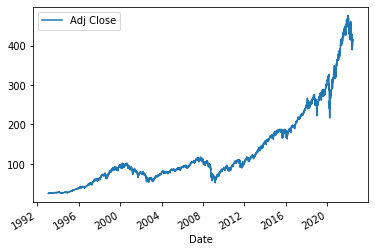

In [165]:
spy.plot()

<AxesSubplot:xlabel='Date'>

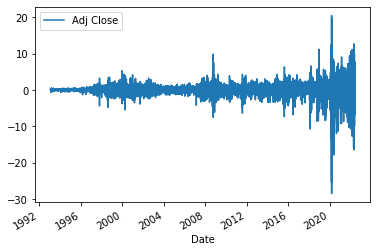

In [164]:
spy.diff().plot()

<AxesSubplot:xlabel='Date'>

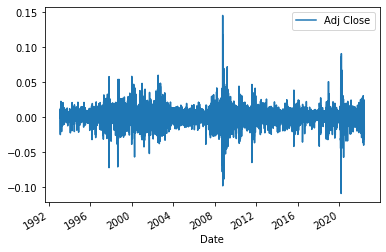

In [166]:
spy.pct_change().plot()